***

<div align="center">
  <h3> Desarrollo de un gestor de inteligencia colectiva y un marco de trabajo para el aprendizaje a través de la resolución colaborativa de      problemas en entornos educativos transmediales </h3>
  <h4> Reporte técnico de Análisis de Datos. </h4>
  <h5> Visualización de los datos: Agrupaciónes generadas al correr los algoritmos de aprendizaje no supervisado </h5>
  <h3> RT - 010 </h3>
  <h3> JOHN FABER FLÓREZ VASCO - MÓDULO DE DATOS - GIANT </h3>
</div>

***

<p style='text-align: justify;'> 

<div align="center">
  <h2> 1. IMPORTANDO PAQUETES Y CONFIGURACIÓN DEL ENTORNO  </h2>
</div>

</p>

In [1]:
import Pkg; 
Pkg.add("Pkg")
using Pkg;

   Updating registry at `~/.julia/registries/General`
   Updating registry at `~/.julia/registries/JuliaComputingRegistry`
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [2]:
# Cargando los paquetes instalados
using DataFrames
using CSV
using Plots
using Statistics
using StatsPlots
using StatsBase
gr()

Plots.GRBackend()

<p style='text-align: justify;'> 

<div align="center">
  <h2> 2. CARGANDO LOS DATOS </h2>
</div>

</p>

In [16]:
# Cargando archivo .CSV con las agrupaciones generadas al correr los distinos modelos de aprendizaje no supervisado
clusteringDataFrame = DataFrame(CSV.File("../data/data_clustering_giant_events.csv"))

,USER_ID,fuzzy_1,hclust_1,kmedoids_1,kmeans_1,fuzzy,hclust,kmedoids,kmeans
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,-10,4,1,4,2,2,1,4,4
2,-1,1,1,4,2,3,1,2,4
3,0,5,2,3,5,2,2,4,3
4,2,4,1,4,2,4,3,5,5
5,3,2,3,5,1,5,4,2,1
6,4,4,1,1,2,4,3,5,1
7,5,5,2,3,5,2,2,4,4
8,6,3,4,1,3,1,3,1,5
9,7,5,2,3,5,2,2,4,4


In [17]:
# Cargando archivo .CSV con la reducción de la dimensionalidad de los datos
dimensionaltyReductionDataFrame = DataFrame(CSV.File("../data/dimensionality_reduction_data.csv"))

,x1,x2
,Float64,Float64
1,6.68101,-1.02408
2,6.08067,-0.760383
3,-2.28362,-4.57755
4,6.34983,-1.23655
5,1.51859,-0.440024
6,4.90403,-3.54161
7,-1.81953,-4.16295
8,9.42508,-6.46348
9,-1.81866,-4.16421


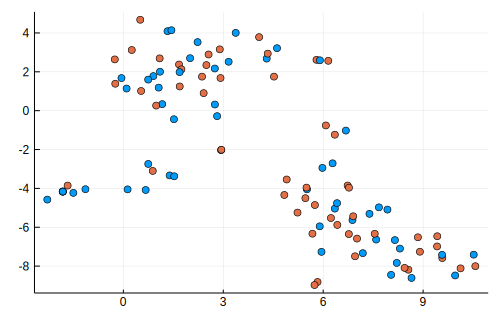

In [18]:
# Graficando los datos en reducción de dimensionalidad
Plots.scatter(dimensionaltyReductionDataFrame[:,1], dimensionaltyReductionDataFrame[:,2],color=[1,2], legend=false,size=(500,320),markersize=4)

In [19]:
# Creando un nuevo dataframe agregando las agrupaciones realizadas al correr los modelos de aprendizaje en bajas dimensiones
clusteringWithReductionalityDimensionDataFrame = DataFrame(
  kmeans = clusteringDataFrame[!, :kmeans_1],
  kmedoids = clusteringDataFrame[!, :kmedoids_1],
  fuzzy = 	clusteringDataFrame[!,:fuzzy_1],
  hclust = clusteringDataFrame[!,:hclust_1],
  x1 = dimensionaltyReductionDataFrame[:, 1],
  x2 = dimensionaltyReductionDataFrame[:, 2],
  USER_ID = clusteringDataFrame[!, :USER_ID]
)

,kmeans,kmedoids,fuzzy,hclust,x1,x2,USER_ID
,Int64,Int64,Int64,Int64,Float64,Float64,Int64
1,2,4,4,1,6.68101,-1.02408,-10
2,2,4,1,1,6.08067,-0.760383,-1
3,5,3,5,2,-2.28362,-4.57755,0
4,2,4,4,1,6.34983,-1.23655,2
5,1,5,2,3,1.51859,-0.440024,3
6,2,1,4,1,4.90403,-3.54161,4
7,5,3,5,2,-1.81953,-4.16295,5
8,3,1,3,4,9.42508,-6.46348,6
9,5,3,5,2,-1.81866,-4.16421,7


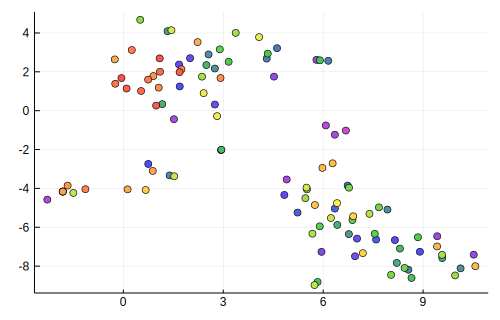

In [20]:
scatter(clusteringWithReductionalityDimensionDataFrame[:,5],clusteringWithReductionalityDimensionDataFrame[:,6], marker_z=clusteringWithReductionalityDimensionDataFrame[:,7],
        color=:lightrainbow, legend=false, size=(500,320))

<div align="center">
  <h2> 3 K-means en bajas dimensiones </h2>
</div>

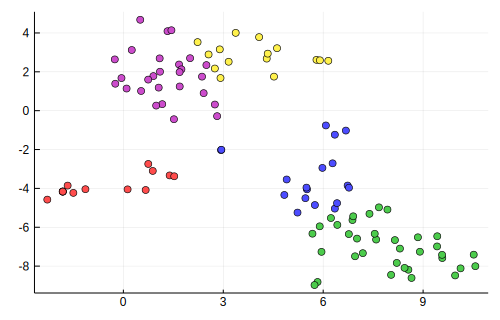

In [21]:
scatter(clusteringWithReductionalityDimensionDataFrame[:,5],clusteringWithReductionalityDimensionDataFrame[:,6], marker_z=clusteringWithReductionalityDimensionDataFrame[:,1],
        color=:lightrainbow, legend=false, size=(500,320))

<div align="center">
  <h2> 4 K-medoids en bajas dimensiones </h2>
</div>

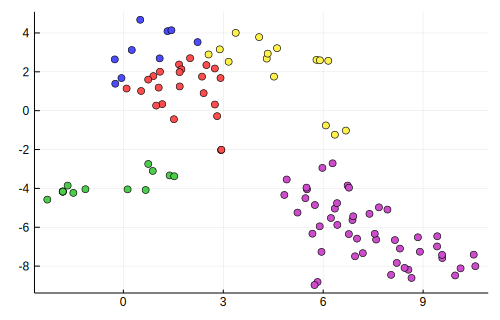

In [22]:
scatter(clusteringWithReductionalityDimensionDataFrame[:,5],clusteringWithReductionalityDimensionDataFrame[:,6], marker_z=clusteringWithReductionalityDimensionDataFrame[:,2],
        color=:lightrainbow, legend=false, size=(500,320))

<div align="center">
  <h2> 5 Hierarchial clustering en bajas dimensiones </h2>
</div>

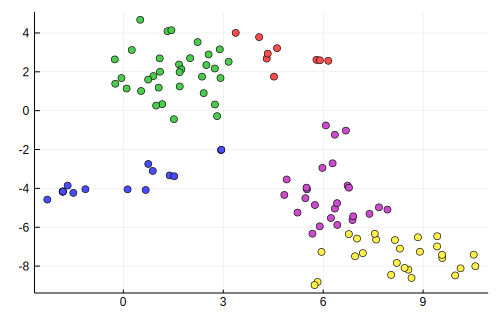

In [23]:
scatter(clusteringWithReductionalityDimensionDataFrame[:,5],clusteringWithReductionalityDimensionDataFrame[:,6], marker_z=clusteringWithReductionalityDimensionDataFrame[:,4],
        color=:lightrainbow, legend=false, size=(500,320))

<div align="center">
  <h2> 6 Fuzzy c-means clustering en bajas dimensiones </h2>
</div>

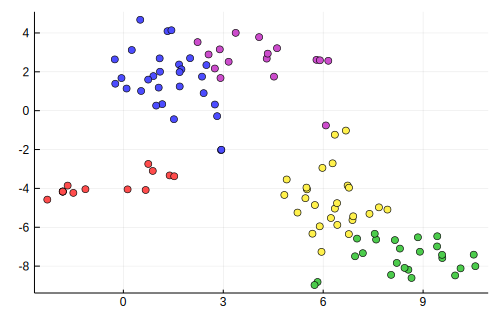

In [24]:
scatter(clusteringWithReductionalityDimensionDataFrame[:,5],clusteringWithReductionalityDimensionDataFrame[:,6], marker_z=clusteringWithReductionalityDimensionDataFrame[:,3 ],
        color=:lightrainbow, legend=false, size=(500,320))

<div align="center">
  <h2> 7 ANÁLISIS DE LOS AGRUPAMIENTOS EVIDENCIADOS DE LOS USUARIOS </h2>
</div>

In [25]:
# Cargando archivo .CSV con las agrupaciones generadas al correr los distinos modelos de aprendizaje no supervisado
usersDataFrame = DataFrame(CSV.File("../data/users_30_10_2020.csv"))

,_id,USER_ID,username,firstname
,String,Int64,String,String
1,5fa09d81bc73eb52ca087af6,1,guest,Invitado
2,5fa09d81bc73eb52ca087af7,2,admin,Admin
3,5fa09d81bc73eb52ca087af8,3,profesor,Profesor
4,5fa09d81bc73eb52ca087af9,4,estudiante,Estudiante
5,5fa09d81bc73eb52ca087afa,5,lcardenf@eafit.edu.co,Luis
6,5fa09d81bc73eb52ca087afb,6,mvasqu23@eafit.edu.co,Mauricio
7,5fa09d81bc73eb52ca087afc,7,cdiazleo@eafit.edu.co,Cristian Andrés
8,5fa09d81bc73eb52ca087afd,8,cospinaf@eafit.edu.co,Carolina
9,5fa09d81bc73eb52ca087afe,9,epreciad@eafit.edu.co,Estefanía


In [1]:
names(usersDataFrame)

UndefVarError: UndefVarError: usersDataFrame not defined

In [27]:
joinResultsDataFrame = innerjoin(usersDataFrame, clusteringDataFrame, on = [:USER_ID => :USER_ID])

,_id,USER_ID,username
,String,Int64,String
1,5fa09d81bc73eb52ca087af7,2,admin
2,5fa09d81bc73eb52ca087af8,3,profesor
3,5fa09d81bc73eb52ca087af9,4,estudiante
4,5fa09d81bc73eb52ca087afa,5,lcardenf@eafit.edu.co
5,5fa09d81bc73eb52ca087afb,6,mvasqu23@eafit.edu.co
6,5fa09d81bc73eb52ca087afc,7,cdiazleo@eafit.edu.co
7,5fa09d81bc73eb52ca087afd,8,cospinaf@eafit.edu.co
8,5fa09d81bc73eb52ca087afe,9,epreciad@eafit.edu.co
9,5fa09d81bc73eb52ca087aff,10,vzapata1@eafit.edu.co


In [28]:
groupKmeansClustering=groupby(joinResultsDataFrame, :kmeans_1)

,_id,USER_ID,username,firstname
,String,Int64,String,String
1,5fa09d81bc73eb52ca087af7,2,admin,Admin
2,5fa09d81bc73eb52ca087af9,4,estudiante,Estudiante
3,5fa09d81bc73eb52ca087b12,29,carlosarturovalenciaarango@gmail.com,Carlos Arturo
4,5fa09d81bc73eb52ca087b13,30,cserna79@gmail.com,Carolina
5,5fa09d81bc73eb52ca087b1f,42,estefaniaporrassanchez23@gmail.com,Deisy Estefania
6,5fa09d81bc73eb52ca087b21,44,carolinaagudelo.de@gmail.com,Diana Carolina
7,5fa09d81bc73eb52ca087b25,48,ie.dforregog2014@gmail.com,Diego Fernando
8,5fa09d81bc73eb52ca087b3e,73,juanf.lopez1@udea.edu.co,Juan Felipe
9,5fa09d81bc73eb52ca087b51,92,managa2499@gmail.com,Mauro


In [33]:
CSV.write("groups_events_giant_1_test.csv", groupKmeansClustering[1])

"groups_events_giant_5_test.csv"